# 偏微分

微分の説明で$f(x) = x^2$ のような変数が1つの関数で説明しました。これを **1変数関数**　といいます。それに対して、複数の変数を持つ関数も存在します。
2変数以上の関数を **多変数関数** といいます。

多変数関数の場合も1変数関数のように微分を考えられますが、多変数の場合には少々込み入った事情が出て来ます。

まず多変数関数を見てみましょう。

$$f(x, y) = x^2 + y^2$$

これを可視化してみます。


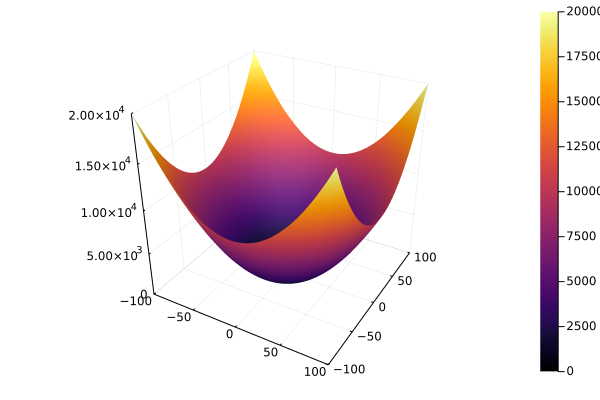

In [5]:
using Plots

N = 100

f(x, y) = x^2  + y^2

X = [x for x in -N:N]
Y = [y for y in -N:N]
Z = [f(x,y) for x in X, y in Y]

plot(X, Y, Z, st=:surface)

## 多変数関数の注意点

上のグラフは$x$軸が−100から100、$y$軸も-100から100までを描画しています。手前の軸を$x$軸、奥行きの軸を$y$軸とすれば$x,y$が定まれば3つ目の値$f(x,y )$が定まるため、3次元のグラフになります。

微分とは「とある瞬間の変化率」でした。それは「限りなくその点に近づける」という近似による操作で求めていましたが、偏微分の場合には少し困ったことが起きます。

それは「どのように近づけるか」です。1変数関数の場合には$x$を限りなく点$x_1$に近づけることで求めましたが、2変数の場合にはとある点として$(x_1, y_1)$に近づける必要があります。
$(x, y)$ を同時に$f(x_1, y_1)$に近づけることができればいいのですが、極限の操作は**一般的に一つずつしか操作できない**ため、$x$を$x_1$に近づけてから$y$を$y_1$に近づけるか、
その逆の$x$を$x_1$に近づけてから$y$を$y_1$に近づける必要が出て来ます。この2つの操作が一致すればめでたく微分可能となるのですが、一般的には**必ずしも一致しない**、もしくは**近づけられない**といったこともあります。

と、ここまで注意をしたものの、機械学習で使われる多変数関数の多くは、両者が一致します。
そのため、とりあえずは両者の操作が一致することを前提に話をすすめます。



## 偏微分

ようやく、偏微分の話に入ります。偏微分とは多変数関数の微分のことです。上述の注意の通り、$x$を近づけることと$y$を近づけるという操作は独立しています。
言い換えると、「$x$について微分する」ことと「$y$について微分する」ことは別々に考えます。


$f(x,y)$を$x$について微分した偏導関数を$f_{x}(x,y)$、$y$について微分したものを$f_{y}(x,y)$と表現します。
（別の少し複雑な表現の仕方がありますが、それはあとで紹介します。むしろそちらを使うことが多いです。）


注意点として、$f(x, y)$を$x$について微分する時、変数$y$を単なる定数として見なします。逆に$f(x,y)$を$y$について微分する時は$x$を定数として見なします。
要するに$x$について微分する時は単純に$x$に関する一変数関数の微分であり、$y$について微分する時は$y$に関する一変数関数の微分と考えます。

式で見ると、次のような感じです。

$$f_x(x,y) = \lim_{h \rightarrow 0} \frac{ f(x+h, y) - f(x, y)  }{h},f_y(x,y) = \lim_{h \rightarrow 0} \frac{ f(x, y+h) - f(x, y)  }{h}  $$

実際に先ほどの$f(x,y)=x^2 + y^2$ をJuliaで偏微分をして見ましょう。


In [11]:
# 近似するための限りなく小さい数
h = 0.000000000001

x = 1.0
y = 1.0

# f（x,y）のx=1における偏微分係数を求める
diff_y = f(x+h, y) - f(x, y)
result_x = diff_y / h
println("f(x, y)をxについて微分すると偏微分径数は", result_x)

# 今度はf(x, y)のyにおける微分を考える
diff_y = f(x, y+h) - f(x, y)
result_x = diff_y / h
println("f(x, y)をyについて微分すると偏微分係数", result_x)





f(x, y)をxについて微分すると2.000177801164682
f(x, y)をyについて微分すると2.000177801164682


偏微分で求められる関数を**偏導関数**と言いますが、それぞれの偏導関数を求めてみましょう。初等関数の微分のときの公式を使います。

（あとで清書します）
<img src="./images/05/01.png" alt="Drawing" style="width: 500px;"/>

すると$f_{x}(x, y) = 2x, f_{y}(x,y)=2y$ というのがわかります。




更に、$f(x, y)$を「$x$で微分してから$y$を微分する」ことを$f_{xy}$と表現し、$y$を微分してから$x$を微分することを $f_{yx}$と表現します。
（別の少し複雑な表現の仕方がありますが、それはあとで紹介します。むしろそちらを使うことが多いです。）

すると$f_{x}(x, y) = 2x, f_{y}(x,y)=2y$であることが上の計算でわかりました。これを今度は$f_{x}(x,y)$については$y$に関して、$f_{y}(x,y)$に関しては$x$について偏微分します。


<img src="./images/05/02.png" alt="Drawing" style="width: 500px;"/>

計算の通り、$f_{x}(x,y)=2x$には$y$の変数がないため、$f_{xy}=0$になります。同様に$f_{y}(x,y)=2x$には$x$の変数がないため、微分すると$f_{xy} = 0$になります。
すなわち、$f_{xy} = f_{yx}$ が成り立ちます。このことを**全微分可能である**といいます。

今回の場合は全微分可能でしたが、関数によっては全微分可能でない関数も存在します。

